In [1]:
import pandas as pd
import random
import datetime

# Import cc data.

In [2]:
cc = pd.read_csv('data_pack/cc.csv')
cc['pos_dt'] = pd.to_datetime(cc['pos_dt']) # convert to datetime formatted.
cc.head()

,cc_no,pos_dt,cc_txn_amt
0,37069,2018-05-10,5000
1,37069,2018-06-04,12000
2,37069,2018-04-03,5000
3,37069,2018-04-22,1600
4,37069,2018-01-21,5000


## Add column week of month. [ cc data ]

In [3]:
week_of_month = [int(i.strftime("%V")) for i in cc['pos_dt']]
cc['week_of_month'] = week_of_month
cc.head(10)

,cc_no,pos_dt,cc_txn_amt,week_of_month
0,37069,2018-05-10,5000,19
1,37069,2018-06-04,12000,23
2,37069,2018-04-03,5000,14
3,37069,2018-04-22,1600,16
4,37069,2018-01-21,5000,3
5,37201,2018-04-13,400,15
6,37201,2018-04-19,300,16
7,37201,2018-01-15,600,3
8,37201,2018-06-13,1500,24
9,37201,2018-01-22,1300,4


## Create new dataframe that group by cc_no and week_of_month.

In [4]:
cc_wom = cc.groupby(['cc_no', 'week_of_month']).sum()
cc_wom = cc_wom.reset_index()
cc_wom.head()

,cc_no,week_of_month,cc_txn_amt
0,2,10,800
1,2,11,3800
2,2,17,18700
3,2,19,800
4,2,20,800


In [5]:
sorted(cc_wom.week_of_month.value_counts().index) # number of week

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26]

# Import Kplus Data

In [6]:
kplus = pd.read_csv('data_pack\kplus.csv')
kplus['sunday'] = pd.to_datetime(kplus['sunday']) # convert to datetime formatted.
kplus.head(10)

,id,sunday,kp_txn_count,kp_txn_amt
0,14802,2018-01-14,2,2400
1,14802,2018-04-01,9,33900
2,14802,2018-05-27,7,6100
3,14802,2018-01-28,3,8500
4,14802,2018-03-25,2,4000
5,14802,2018-05-06,12,35300
6,14802,2018-03-11,1,4500
7,14802,2018-01-07,6,20800
8,14802,2018-06-03,11,42900
9,14802,2018-02-04,11,49800


## Add column week of month. [ kplus data ]

In [7]:
kplus_week_of_month = [int(i.strftime("%V")) for i in kplus['sunday']]
kplus['week_of_month'] = kplus_week_of_month # add column week_of_month.
kplus.head(10)

,id,sunday,kp_txn_count,kp_txn_amt,week_of_month
0,14802,2018-01-14,2,2400,2
1,14802,2018-04-01,9,33900,13
2,14802,2018-05-27,7,6100,21
3,14802,2018-01-28,3,8500,4
4,14802,2018-03-25,2,4000,12
5,14802,2018-05-06,12,35300,18
6,14802,2018-03-11,1,4500,10
7,14802,2018-01-07,6,20800,1
8,14802,2018-06-03,11,42900,22
9,14802,2018-02-04,11,49800,5


In [8]:
sorted(kplus.week_of_month.value_counts().index) # number of week

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25]

# Import demographics data.

In [9]:
demo = pd.read_csv('data_pack/demographics.csv')
demo = demo.fillna(value={'ocp_cd':random.choice([1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 11.0, 12.0, 13.0])})
demo = demo.interpolate(method ='nearest', limit_direction ='forward')
demo.head(10)

,id,cc_no,gender,ocp_cd,age
0,1,1,2,9.0,5
1,1,98397,2,9.0,5
2,2,2,2,3.0,4
3,2,9740,2,3.0,4
4,3,3,2,1.0,3
5,4,4,2,3.0,5
6,4,86813,2,3.0,5
7,5,5,2,9.0,4
8,6,6,1,3.0,3
9,6,91379,1,3.0,3


In [10]:
sorted(demo.ocp_cd.value_counts().index)

[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 11.0, 12.0, 13.0]

In [11]:
demo_cc = demo.sort_values('cc_no')
demo_cc = demo_cc.set_index('cc_no')

In [12]:
cc_wom.head()

,cc_no,week_of_month,cc_txn_amt
0,2,10,800
1,2,11,3800
2,2,17,18700
3,2,19,800
4,2,20,800


In [13]:
for i in range(1,27):
    tmp = cc_wom[cc_wom['week_of_month'] == i]
    tmp = tmp.set_index('cc_no')
    demo_cc['cc_week_'+str(i)] = tmp.cc_txn_amt

In [14]:
demo_f = demo_cc.groupby('id').mean()
demo_f.sample(10)

,gender,ocp_cd,age,cc_week_1,cc_week_2,cc_week_3,cc_week_4,cc_week_5,cc_week_6,cc_week_7,...,cc_week_17,cc_week_18,cc_week_19,cc_week_20,cc_week_21,cc_week_22,cc_week_23,cc_week_24,cc_week_25,cc_week_26
id,,,,,,,,,,,,,,,,,,,,,
39726,2,3.0,4,NaN,1300.0,5100.0,NaN,NaN,NaN,3100.0,...,NaN,NaN,NaN,3100.0,NaN,NaN,NaN,3100.0,NaN,NaN
30320,1,3.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48954,2,3.0,5,8500.0,16600.0,600.0,2750.0,NaN,2300.0,3200.0,...,NaN,1933.333333,5100.0,35000.0,1300.0,NaN,33600.0,100.0,53850.0,3800.0
60092,1,3.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59411,2,3.0,3,2100.0,1000.0,2600.0,2300.0,800.0,5100.0,NaN,...,500.0,1200.000000,1400.0,1800.0,800.0,NaN,NaN,NaN,NaN,NaN
53018,2,9.0,4,NaN,NaN,NaN,NaN,NaN,10200.0,NaN,...,NaN,NaN,NaN,NaN,NaN,1100.0,NaN,NaN,NaN,NaN
52954,2,3.0,4,600.0,700.0,600.0,NaN,NaN,3900.0,1700.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19068,1,3.0,3,NaN,NaN,500.0,800.0,NaN,NaN,500.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,500.0,NaN
44392,2,3.0,3,NaN,NaN,NaN,2100.0,NaN,1100.0,1400.0,...,NaN,900.000000,3000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
for i in range(1,26):
    tmp = kplus[kplus['week_of_month'] == i]
    tmp = tmp.set_index('id')
    demo_f['kp_week_'+str(i)] = tmp.kp_txn_amt

### Extract more feture [ onehot ocp_cc ]

In [16]:
demo_f.ocp_cd = pd.to_numeric(demo_f.ocp_cd, downcast='integer')

In [17]:
onehot_ocp = pd.get_dummies(demo_f.ocp_cd, prefix='ocp', dtype=int)

In [18]:
onehot_ocp

,ocp_1,ocp_2,ocp_3,ocp_4,ocp_5,ocp_6,ocp_7,ocp_8,ocp_9,ocp_11,ocp_12,ocp_13
id,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,1,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
64996,0,0,1,0,0,0,0,0,0,0,0,0
64997,0,0,1,0,0,0,0,0,0,0,0,0
64998,0,0,0,0,0,0,0,0,1,0,0,0


In [19]:
demo_onehot = pd.concat([demo_f, onehot_ocp], axis=1)

In [20]:
demo_onehot

,gender,ocp_cd,age,cc_week_1,cc_week_2,cc_week_3,cc_week_4,cc_week_5,cc_week_6,cc_week_7,...,ocp_3,ocp_4,ocp_5,ocp_6,ocp_7,ocp_8,ocp_9,ocp_11,ocp_12,ocp_13
id,,,,,,,,,,,,,,,,,,,,,
1,2,9,5,NaN,NaN,4700.0,NaN,NaN,NaN,20000.0,...,0,0,0,0,0,0,1,0,0,0
2,2,3,4,1600.0,NaN,NaN,3500.0,2600.0,800.0,NaN,...,1,0,0,0,0,0,0,0,0,0
3,2,1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
4,2,3,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,0,0,0,0,0,0,0,0,0
5,2,9,4,NaN,NaN,5000.0,2000.0,NaN,5000.0,NaN,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64996,2,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,0,0,0,0,0,0,0,0,0
64997,2,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,0,0,0,0,0,0,0,0,0
64998,1,9,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,1,0,0,0


### Fill na with zero

In [21]:
demo_f = demo_onehot.fillna(0)

### Drop ocp_cc

In [22]:
demo_f.drop('ocp_cd', axis=1, inplace=True)

In [23]:
demo_f.head()

,gender,age,cc_week_1,cc_week_2,cc_week_3,cc_week_4,cc_week_5,cc_week_6,cc_week_7,cc_week_8,...,ocp_3,ocp_4,ocp_5,ocp_6,ocp_7,ocp_8,ocp_9,ocp_11,ocp_12,ocp_13
id,,,,,,,,,,,,,,,,,,,,,
1,2,5,0.0,0.0,4700.0,0.0,0.0,0.0,20000.0,0.0,...,0,0,0,0,0,0,1,0,0,0
2,2,4,1600.0,0.0,0.0,3500.0,2600.0,800.0,0.0,3800.0,...,1,0,0,0,0,0,0,0,0,0
3,2,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,2,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0
5,2,4,0.0,0.0,5000.0,2000.0,0.0,5000.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0


In [24]:
demo_f.tail()

,gender,age,cc_week_1,cc_week_2,cc_week_3,cc_week_4,cc_week_5,cc_week_6,cc_week_7,cc_week_8,...,ocp_3,ocp_4,ocp_5,ocp_6,ocp_7,ocp_8,ocp_9,ocp_11,ocp_12,ocp_13
id,,,,,,,,,,,,,,,,,,,,,
64996,2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0
64997,2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0
64998,1,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0
64999,2,3,0.0,900.0,0.0,1000.0,0.0,0.0,0.0,2400.0,...,1,0,0,0,0,0,0,0,0,0
65000,2,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0


In [68]:
demo_f.to_csv('complete_data.csv',index=False)

----------

# Prepare data for tarin and test.

In [25]:
# import train data
train = pd.read_csv('data_pack/train.csv')

In [26]:
X_train = demo_f.loc[0:45000]
X_test = demo_f.loc[45001:50000]

y_train = train.income.loc[0:44999]
y_test = train.income.loc[45000:50000]

In [27]:
y_train

0         20000
1        106000
2         29000
3         61000
4         18000
          ...  
44995     21000
44996     19000
44997     22000
44998     25000
44999     22000
Name: income, Length: 45000, dtype: int64

In [28]:
demo_test = demo_f.loc[50001:]

----------

# TPOD Auto model.

In [56]:
# from tpot import TPOTClassifier
from tpot import TPOTRegressor

# tpot = TPOTRegressor(n_jobs=-1)
tpot = TPOTRegressor(generations=5, population_size=50, verbosity=2, n_jobs=-1)

tpot.fit(X_train, y_train)

Generation 1 - Current best internal CV score: -2060369107.9712796
Generation 2 - Current best internal CV score: -2046905100.9853184
Generation 3 - Current best internal CV score: -2046905100.9853184
Generation 4 - Current best internal CV score: -2046905100.9853184
Generation 5 - Current best internal CV score: -2027027090.362114

Best pipeline: RandomForestRegressor(ExtraTreesRegressor(input_matrix, bootstrap=True, max_features=0.2, min_samples_leaf=10, min_samples_split=15, n_estimators=100), bootstrap=True, max_features=0.2, min_samples_leaf=20, min_samples_split=11, n_estimators=100)


TPOTRegressor(config_dict=None, crossover_rate=0.1, cv=5,
              disable_update_check=False, early_stop=None, generations=5,
              max_eval_time_mins=5, max_time_mins=None, memory=None,
              mutation_rate=0.9, n_jobs=-1, offspring_size=None,
              periodic_checkpoint_folder=None, population_size=50,
              random_state=None, scoring=None, subsample=1.0, template=None,
              use_dask=False, verbosity=2, warm_start=False)

In [57]:
print(tpot.score(X_test, y_test))

-1965040098.803332


In [67]:
tpot.export('model0.py')

In [59]:
test = pd.read_csv('data_pack/test.csv')
test['income'] = tpot.predict(demo_test)

In [60]:
import matplotlib.pyplot as plt

{'whiskers': [<matplotlib.lines.Line2D at 0x22301fa31c8>,
 'caps': [<matplotlib.lines.Line2D at 0x223030d4448>,
 'boxes': [<matplotlib.lines.Line2D at 0x22303164988>],
 'medians': [<matplotlib.lines.Line2D at 0x223030ec388>],
 'fliers': [<matplotlib.lines.Line2D at 0x223030ecc88>],
 'means': []}

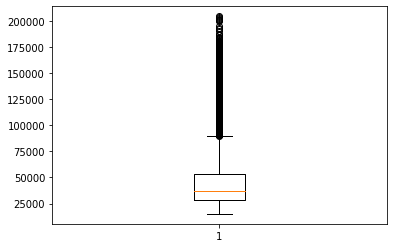

In [63]:
plt.boxplot(test.income)

# Train with all data

In [70]:
X = demo_f[0:50000]
y = train.income

In [71]:
tpot.fit(X, y)

Generation 1 - Current best internal CV score: -2051790718.4851792
Generation 2 - Current best internal CV score: -2036297138.5523484
Generation 3 - Current best internal CV score: -2036297138.5523484
Generation 4 - Current best internal CV score: -2036297138.5523484
Generation 5 - Current best internal CV score: -2036297138.5523484

Best pipeline: GradientBoostingRegressor(ExtraTreesRegressor(input_matrix, bootstrap=True, max_features=0.35000000000000003, min_samples_leaf=11, min_samples_split=9, n_estimators=100), alpha=0.8, learning_rate=0.1, loss=ls, max_depth=5, max_features=0.1, min_samples_leaf=5, min_samples_split=6, n_estimators=100, subsample=1.0)


TPOTRegressor(config_dict=None, crossover_rate=0.1, cv=5,
              disable_update_check=False, early_stop=None, generations=5,
              max_eval_time_mins=5, max_time_mins=None, memory=None,
              mutation_rate=0.9, n_jobs=-1, offspring_size=None,
              periodic_checkpoint_folder=None, population_size=50,
              random_state=None, scoring=None, subsample=1.0, template=None,
              use_dask=False, verbosity=2, warm_start=False)

In [72]:
print(tpot.score(X_test, y_test))

-1521563383.7423344


In [73]:
tpot.export('model1.py')

In [74]:
test = pd.read_csv('data_pack/test.csv')
test['income'] = tpot.predict(demo_test)

{'whiskers': [<matplotlib.lines.Line2D at 0x223000fc688>,
 'caps': [<matplotlib.lines.Line2D at 0x22302c35b08>,
 'boxes': [<matplotlib.lines.Line2D at 0x22302c1fb88>],
 'medians': [<matplotlib.lines.Line2D at 0x22302f9c588>],
 'fliers': [<matplotlib.lines.Line2D at 0x22302fa0ac8>],
 'means': []}

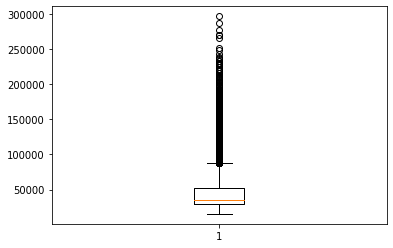

In [75]:
plt.boxplot(test.income)

In [77]:
test.to_csv('TPOTopt.csv', index=False)